In [1]:
# Homework Submitted By: Veena Kottoor
# Below dependencies were given

%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview

pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

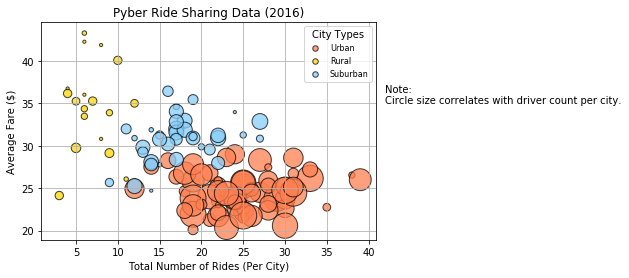

In [2]:
# Obtain the data frames for the city types (urban, rural, suburban)

urban = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

# Urban type calculations

x_urban = urban["ride_id"].count()
y_urban = urban["fare"].mean()
s_urban = urban["driver_count"].mean()

# Rural type calculations

x_rural = rural["ride_id"].count()
y_rural = rural["fare"].mean()
s_rural = rural["driver_count"].mean()

# Suburban type calculations

x_suburban = suburban["ride_id"].count()
y_suburban = suburban["fare"].mean()
s_suburban = suburban["driver_count"].mean()

# Build the scatter plots for each city types
# Using effects like alpha, edgecolor, and linewidths

plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", linewidth = 1, alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", linewidth = 1, alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], linewidth = 1, edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
# Add x-axis/y-axis labels and graph title

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend

legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure

plt.savefig("PyberRideSharingData(2016).png", bbox_inches="tight")

# Show plot

plt.show()

## Total Fares by City Type

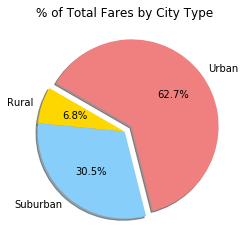

In [3]:
# Total Fares by City Type
# Calculate Type Percents

type_group = pyber_df.groupby(['type'])
fares = type_group['fare'].sum()

# Build Pie Chart
# Using effects like shadow, startangle, and explode

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%.1f%%", shadow=True, startangle=150 )
plt.title("% of Total Fares by City Type")

# Save Figure

plt.savefig("%ofTotalFaresbyCityType.png")

# Show Figure

plt.show()

## Total Rides by City Type

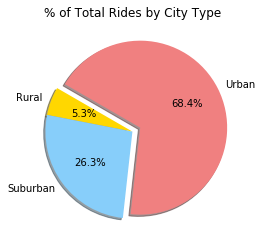

In [4]:
# Total Rides by City Type
# Calculate Type Percents

rides = type_group['ride_id'].count()

# Build Pie Chart
# Using effects like shadow, startangle, and explode

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure

plt.savefig("%ofTotalRidesbyCityType.png")

# Show Figure

plt.show()

## Total Drivers by City Type

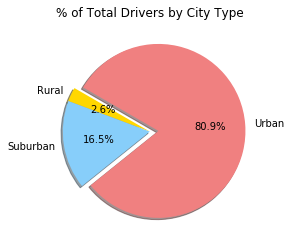

In [5]:
# Total Drivers by City Type
# Calculate Driver Percents

type_group_drivers = city_data.groupby(['type'])
total_drivers = type_group_drivers['driver_count'].sum()

# Build Pie Chart
# Using effects like shadow, startangle, and explode

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,autopct="%.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure

plt.savefig("%ofTotalDriversbyCityType.png")

# Show Figure

plt.show()